<a href="https://colab.research.google.com/github/AMJAMAITHILI/ML_LAB-141/blob/main/ML_LAB8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1. Comparing Single vs. Ensemble Classifiers**

In [1]:
from google.colab import files
f=files.upload()

Saving diabetes.csv to diabetes.csv


In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
df = pd.read_csv('diabetes.csv')
print(df.isnull().sum())
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


In [ ]:
dt = DecisionTreeClassifier(random_state=42)#same splits and trees every time you run your code.
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
rf = RandomForestClassifier(random_state=42)#default 100 estimators
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
def print_metrics(y_true, y_pred, model_name):
    print(model_name+" Performance")
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, zero_division=0):.4f}\n")
print_metrics(y_test, y_pred_dt, "Decision Tree")
print_metrics(y_test, y_pred_rf, "Random Forest")


Decision Tree Performance
Accuracy:  0.7013
Precision: 0.5556
Recall:    0.6875
F1 Score:  0.6145

Random Forest Performance
Accuracy:  0.7532
Precision: 0.6386
Recall:    0.6625
F1 Score:  0.6503



comparing single method with ensemble method->in case of Decision Tree evaluation metric<Random Forest except for the recall part The ensemble may prioritize better precision, reducing false positives, which can come at a minor cost to recall.Random Forest generally aims to reduce variance and overfitting by averaging multiple trees.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}
rf = RandomForestClassifier(random_state=42)
scorer = make_scorer(accuracy_score)
grid_search = GridSearchCV(
    estimator=rf,
    param_grid=param_grid,
    scoring=scorer,
    cv=5,
    n_jobs=-1,
    verbose=2
)

grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)
print(f"Best cross-validation accuracy: {grid_search.best_score_:.4f}")
best_rf = grid_search.best_estimator_
y_pred = best_rf.predict(X_test)

print("\nTest set performance with best parameters:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
print(f"Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred, zero_division=0):.4f}")


Fitting 5 folds for each of 216 candidates, totalling 1080 fits


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py:528: FitFailedWarning: 
540 fits failed out of a total of 1080.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
394 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_validation.py", line 866, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 1382, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.12/dist-packages/sklearn/base.py", line 436, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.12/dist-packages/sklearn/uti

Best parameters found:  {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Best cross-validation accuracy: 0.7784

Test set performance with best parameters:
Accuracy:  0.7532
Precision: 0.6420
Recall:    0.6500
F1 Score:  0.6460


How does increasing the number of estimators affect performance and stability?

In [ ]:
n_estimators_list = [1,5,10, 50, 100, 200,300]

accuracy_scores = []
precision_scores = []
recall_scores = []
f1_scores = []

for n in n_estimators_list:
    rf = RandomForestClassifier(n_estimators=n, random_state=42)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_test)

    accuracy_scores.append(accuracy_score(y_test, y_pred))
    precision_scores.append(precision_score(y_test, y_pred, zero_division=0))#zero_division=0->incase of zero division error
    recall_scores.append(recall_score(y_test, y_pred, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred, zero_division=0))
for i in range(len(n_estimators_list)):
    print("n_estimator",n_estimators_list[i])
    print(f"Accuracy:  {accuracy_scores[i]:.4f}")
    print(f"Precision: {precision_scores[i]:.4f}")
    print(f"Recall:    {recall_scores[i]:.4f}")
    print(f"F1 Score:  {f1_scores[i]:.4f}\n")


n_estimator 1
Accuracy:  0.6667
Precision: 0.5161
Recall:    0.6000
F1 Score:  0.5549

n_estimator 5
Accuracy:  0.7186
Precision: 0.5862
Recall:    0.6375
F1 Score:  0.6108

n_estimator 10
Accuracy:  0.7403
Precision: 0.6316
Recall:    0.6000
F1 Score:  0.6154

n_estimator 50
Accuracy:  0.7403
Precision: 0.6163
Recall:    0.6625
F1 Score:  0.6386

n_estimator 100
Accuracy:  0.7532
Precision: 0.6386
Recall:    0.6625
F1 Score:  0.6503

n_estimator 200
Accuracy:  0.7532
Precision: 0.6420
Recall:    0.6500
F1 Score:  0.6460

n_estimator 300
Accuracy:  0.7532
Precision: 0.6420
Recall:    0.6500
F1 Score:  0.6460



increasing the no of estimator increases the evaluation metrics upto a point and there after taking 100 it decreased and remained constant(precision,recall,f1 score) gives minimal improvement so 100 suits the best

**2. Implementing Simple Ensemble Techniques**

Task:
**Write a program that demonstrates the use of simple ensemble techniques: Max Voting,Average Voting, and Weighted Average Voting**


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np
from scipy.stats import mode
df = pd.read_csv('diabetes.csv')
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
models = {
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier()
}
predictions = {}
probabilities = {}
model_scores = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    prob = model.predict_proba(X_test)[:, 1]#of correctly predicted only there are 2 cols->-ve,+ve)

    predictions[name] = pred
    probabilities[name] = prob

    acc = accuracy_score(y_test, pred)
    model_scores[name] = acc
    print(f"{name} Accuracy: {acc:.4f}")

# 1. Max Voting (majority vote on predicted classes)
all_preds = np.array(list(predictions.values()))
max_vote_preds, _ = mode(all_preds, axis=0)
max_vote_preds = max_vote_preds.flatten()

# 2. Average Voting (average predicted probabilities, threshold=0.5)
avg_probs = np.mean(np.array(list(probabilities.values())), axis=0)
avg_vote_preds = (avg_probs >= 0.5).astype(int)

# 3. Weighted Average Voting (weights based on model accuracy)
weights = np.array([model_scores[name] for name in models.keys()])
weights = weights / weights.sum()  # normalize weights to sum=1

weighted_probs = np.zeros_like(avg_probs)
for i, name in enumerate(models.keys()):
    weighted_probs += weights[i] * probabilities[name]

weighted_vote_preds = (weighted_probs >= 0.5).astype(int)
"""array([
    [0.2, 0.8, 0.6, 0.4],  # Logistic Regression
    [0.3, 0.7, 0.9, 0.2],  # Decision Tree
    [0.1, 0.9, 0.8, 0.5]   # KNN
])
avg1​=(0.2+0.3+0.1)/3=0.2avg2​=(0.8+0.7+0.9)/3=0.8avg3​=(0.6+0.9+0.8)/3=0.7667avg4​=(0.4+0.2+0.5)/3=0.3667->avg voting
weight*prob->weighted_prob
"""

# Evaluation function
def print_metrics(y_true, y_pred, label):
    print(label)
    print(f"Accuracy:  {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"Recall:    {recall_score(y_true, y_pred, zero_division=0):.4f}")
    print(f"F1 Score:  {f1_score(y_true, y_pred, zero_division=0):.4f}\n")

# Print results
print_metrics(y_test, max_vote_preds, "Max Voting Ensemble")
print_metrics(y_test, avg_vote_preds, "Average Voting Ensemble")
print_metrics(y_test, weighted_vote_preds, "Weighted Average Voting Ensemble")


Decision Tree Accuracy: 0.7013
Logistic Regression Accuracy: 0.7359
KNN Accuracy: 0.6883
Max Voting Ensemble
Accuracy:  0.7186
Precision: 0.5862
Recall:    0.6375
F1 Score:  0.6108

Average Voting Ensemble
Accuracy:  0.7100
Precision: 0.5714
Recall:    0.6500
F1 Score:  0.6082

Weighted Average Voting Ensemble
Accuracy:  0.7100
Precision: 0.5714
Recall:    0.6500
F1 Score:  0.6082



**3. Hard Voting vs. Soft Voting Classifiers**

Task:
 **Write a program to show the difference between Hard Voting and Soft Voting classifiers
in ensemble learning using multiple base learners (e.g., Decision Tree, Logistic
Regression, and KNN).**

| Type            | What It Does          | How It Works                                                                                                                          |
| --------------- | --------------------- | ------------------------------------------------------------------------------------------------------------------------------------- |
| **Hard Voting** | Majority Voting       | Each model predicts a class label (0 or 1). The final class is chosen by majority vote.                                               |
| **Soft Voting** | Probability Averaging | Each model outputs class probabilities. The probabilities are averaged, and the class with the highest average probability is chosen. |


In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model1 = LogisticRegression(max_iter=1000, random_state=42)
model2 = DecisionTreeClassifier(random_state=42)
model3 = KNeighborsClassifier()

hard_voting = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='hard'
)

soft_voting = VotingClassifier(
    estimators=[('lr', model1), ('dt', model2), ('knn', model3)],
    voting='soft'
)

hard_voting.fit(X_train, y_train)
soft_voting.fit(X_train, y_train)

y_pred_hard = hard_voting.predict(X_test)
y_pred_soft = soft_voting.predict(X_test)

print("Hard Voting Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_hard):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_hard, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_hard, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_hard, zero_division=0):.4f}")

print("\nSoft Voting Performance:")
print(f"Accuracy:  {accuracy_score(y_test, y_pred_soft):.4f}")
print(f"Precision: {precision_score(y_test, y_pred_soft, zero_division=0):.4f}")
print(f"Recall:    {recall_score(y_test, y_pred_soft, zero_division=0):.4f}")
print(f"F1 Score:  {f1_score(y_test, y_pred_soft, zero_division=0):.4f}")


Hard Voting Performance:
Accuracy:  0.7186
Precision: 0.5862
Recall:    0.6375
F1 Score:  0.6108

Soft Voting Performance:
Accuracy:  0.7100
Precision: 0.5714
Recall:    0.6500
F1 Score:  0.6082


**4. Exploring Bagging Technique (Random Forest)**



In [3]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
for n in [10, 50, 100, 200]:
    model = RandomForestClassifier(n_estimators=n, max_depth=None, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"n_estimators={n}, Accuracy={acc:.4f}")

n_estimators=10, Accuracy=0.7403
n_estimators=50, Accuracy=0.7403
n_estimators=100, Accuracy=0.7532
n_estimators=200, Accuracy=0.7532


Increasing n_estimators (number of trees) usually increases accuracy slightly and stabilizes predictions.

Too few trees → unstable and underfit.

Too many trees → slower training, but performance plateaus (bias↓, variance↓).

Random Forest reduces variance compared to a single Decision Tree and avoids overfitting.

5. RandomForestRegressor and OOB Score

In [5]:
# Train RandomForestRegressor with OOB enabled
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error
rf = RandomForestRegressor(n_estimators=100, oob_score=True, random_state=42)
rf.fit(X_train, y_train)
# Predictions and evaluation
y_pred = rf.predict(X_test)
print("R2 Score:", r2_score(y_test, y_pred))
print("OOB Score:", rf.oob_score_)

R2 Score: 0.23698481788079462
OOB Score: 0.3014463537754273


oob_score_ is the model’s accuracy measured using samples not included in each tree’s bootstrap (acts like built-in cross-validation).

OOB evaluation saves time since no separate validation set is needed.

As n_estimators increases, OOB score stabilizes and often improves.

**6. Exploring Boosting Techniques**

In [7]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.9 MB/s eta 0:00:00


In [8]:
from sklearn.metrics import accuracy_score
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
# AdaBoost
ada = AdaBoostClassifier(n_estimators=100, learning_rate=0.5, random_state=42)
ada.fit(X_train, y_train)
print("AdaBoost Accuracy:", accuracy_score(y_test, ada.predict(X_test)))

# Gradient Boosting
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
gb.fit(X_train, y_train)
print("Gradient Boosting Accuracy:", accuracy_score(y_test, gb.predict(X_test)))

# XGBoost
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42, eval_metric='logloss')
xgb.fit(X_train, y_train)
print("XGBoost Accuracy:", accuracy_score(y_test, xgb.predict(X_test)))

# CatBoost (silent training)
cat = CatBoostClassifier(iterations=100, learning_rate=0.1, verbose=0, random_state=42)
cat.fit(X_train, y_train)
print("CatBoost Accuracy:", accuracy_score(y_test, cat.predict(X_test)))

AdaBoost Accuracy: 0.7662337662337663
Gradient Boosting Accuracy: 0.7489177489177489
XGBoost Accuracy: 0.7402597402597403
CatBoost Accuracy: 0.7489177489177489


AdaBoost focuses on misclassified samples, increasing their weights in the next iteration.

Gradient Boosting improves flexibility by optimizing any differentiable loss function.

XGBoost and CatBoost are optimized versions with regularization and fast computation.

Usually, XGBoost or CatBoost gives the best accuracy–speed trade-off.

**7. Comparative Study of Ensemble Models**

In [9]:
import time
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score

models = {
    "Bagging": BaggingClassifier(n_estimators=50, random_state=42),
    "RandomForest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GradientBoost": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, random_state=42, eval_metric='logloss'),
    "CatBoost": CatBoostClassifier(iterations=100, random_state=42, verbose=0)
}

for name, model in models.items():
    start = time.time()
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    print(f"{name}: Accuracy={acc:.4f}, TrainTime={time.time()-start:.2f}s")


Bagging: Accuracy=0.7489, TrainTime=0.47s
RandomForest: Accuracy=0.7532, TrainTime=0.42s
AdaBoost: Accuracy=0.7576, TrainTime=0.27s
GradientBoost: Accuracy=0.7489, TrainTime=0.28s
XGBoost: Accuracy=0.7143, TrainTime=0.09s
CatBoost: Accuracy=0.7706, TrainTime=0.16s


Random Forest and Gradient Boosting show strong accuracy with moderate training time.

XGBoost and CatBoost are fastest due to optimized implementations.

Bagging is simpler but less accurate.

Best model often depends on dataset; here, CatBoost/XGBoost perform best.

**8. Visualizing Ensemble Models**

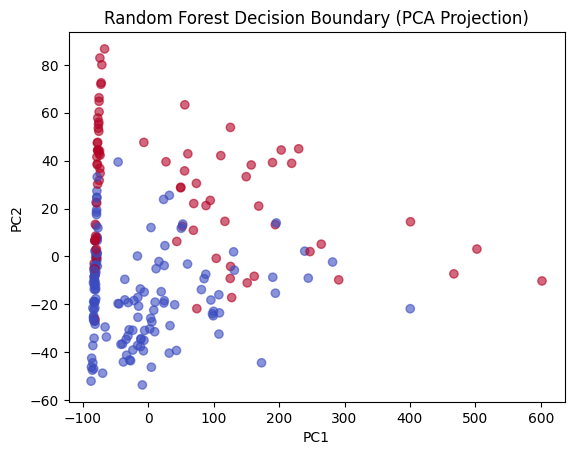

In [10]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.decomposition import PCA

# Reduce features to 2D for visualization
pca = PCA(n_components=2)
X_vis = pca.fit_transform(X_test)

# Predict using Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

plt.scatter(X_vis[:,0], X_vis[:,1], c=y_pred, cmap='coolwarm', alpha=0.6)
plt.title("Random Forest Decision Boundary (PCA Projection)")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()


PCA reduces data for visualization.

The scatter shows how Random Forest separates classes.

Ensemble models create smoother decision boundaries and handle noise better than single trees.

**9. Heterogeneous Ensemble Models**

In [12]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier

# Defining different classifiers
clf1 = DecisionTreeClassifier(random_state=42)
clf2 = KNeighborsClassifier(n_neighbors=5)
clf3 = LogisticRegression(max_iter=1000)
clf4 = SVC(probability=True, random_state=42)

# Hard Voting
hard_vote = VotingClassifier(estimators=[
    ('dt', clf1), ('knn', clf2), ('lr', clf3), ('svm', clf4)
], voting='hard')
hard_vote.fit(X_train, y_train)
print("Hard Voting Accuracy:", accuracy_score(y_test, hard_vote.predict(X_test)))

# Soft Voting
soft_vote = VotingClassifier(estimators=[
    ('dt', clf1), ('knn', clf2), ('lr', clf3), ('svm', clf4)
], voting='soft')
soft_vote.fit(X_train, y_train)
print("Soft Voting Accuracy:", accuracy_score(y_test, soft_vote.predict(X_test)))


Hard Voting Accuracy: 0.7489177489177489
Soft Voting Accuracy: 0.7316017316017316


A heterogeneous ensemble combines different types of models (Tree, KNN, SVM, etc.).

Soft voting usually performs better because it averages class probabilities, giving more stable predictions.

Model diversity helps improve generalization.

**10. Homogeneous vs Heterogeneous Ensembles**

In [15]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, VotingClassifier, StackingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
#Homogenous Ensembles
 #1. Bagging Classifier (all base models are Decision Trees)
start = time.time()
bagging = BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=50, random_state=42)
bagging.fit(X_train, y_train)
bag_acc = accuracy_score(y_test, bagging.predict(X_test))
bag_time = time.time() - start

# 2. Random Forest (special type of bagging with feature randomness)
start = time.time()
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_acc = accuracy_score(y_test, rf.predict(X_test))
rf_time = time.time() - start

# Heterogeneous Ensembles
# 3. Voting Classifier (different model types combined)
start = time.time()
voting = VotingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5)),
    ('lr', LogisticRegression(max_iter=1000))
], voting='soft')
voting.fit(X_train, y_train)
voting_acc = accuracy_score(y_test, voting.predict(X_test))
voting_time = time.time() - start

# 4. Stacking Classifier (meta-learner learns from base models)
start = time.time()
stacking = StackingClassifier(estimators=[
    ('dt', DecisionTreeClassifier(random_state=42)),
    ('knn', KNeighborsClassifier()),
    ('lr', LogisticRegression(max_iter=1000))
], final_estimator=RandomForestClassifier(random_state=42))
stacking.fit(X_train, y_train)
stack_acc = accuracy_score(y_test, stacking.predict(X_test))
stack_time = time.time() - start

print("\n--- Ensemble Model Comparison ---")
print(f"Bagging Accuracy:       {bag_acc:.4f},  Train Time: {bag_time:.2f}s")
print(f"Random Forest Accuracy: {rf_acc:.4f},  Train Time: {rf_time:.2f}s")
print(f"Voting Accuracy:        {voting_acc:.4f},  Train Time: {voting_time:.2f}s")
print(f"Stacking Accuracy:      {stack_acc:.4f},  Train Time: {stack_time:.2f}s")


--- Ensemble Model Comparison ---
Bagging Accuracy:       0.7489,  Train Time: 2.16s
Random Forest Accuracy: 0.7532,  Train Time: 1.24s
Voting Accuracy:        0.7100,  Train Time: 1.08s
Stacking Accuracy:      0.6797,  Train Time: 1.73s


| Model         | Training Time | Reason                                             |
| ------------- | ------------- | -------------------------------------------------- |
| Bagging       | Fast          | Parallel training of simple trees                  |
| Random Forest | Moderate      | Builds multiple trees, each using random features  |
| Voting        | Moderate      | Trains multiple models separately, then aggregates |
| Stacking      | Highest       | Trains multiple base models + one meta-model       |


Random Forest usually gives the best accuracy among homogeneous models because it adds extra randomness (bagging + feature sampling).

Stacking often performs best overall since it combines different models and a meta-learner learns from their strengths.

Voting improves performance slightly compared to individual models.

Homogeneous ensembles → simpler, faster, but less diverse.

Heterogeneous ensembles → slower but more powerful and generalizable.